In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/xray_knees.csv
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/6.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/5.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/0.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/1.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/1.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/2.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/5.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/4.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/4.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/3.jpg
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/6.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files/stage_1/0.dcm
/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/fil

In [2]:
import warnings
warnings.filterwarnings('ignore')

*اعلان و اطلاعاتی درباره ی برنامه در هر بخش که لازم بود می نویسد*

In [3]:
import os # ارتباط کد با سیستم 
import pandas as pd # طراحی جدول برای تحلیل داده
import numpy as np #  با استفاده از این کتابخانه امکان استفاده از آرایه‌ها و ماتریس‌های بزرگ چند بعدی فراهم می‌شود
import tensorflow as tf # کتابخانه ای برای ساخت نورال نت وورک
from tensorflow.keras.preprocessing.image import ImageDataGenerator # با استفاده از این کتابخانه می توان داده های افزوده به عکس های ورودی اضافه کرد
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras import layers, models, optimizers # مدلی که کد را به شدت بهینه می کند 
from tensorflow.keras.models import Sequential # مدلی برای حفظ توالی و مرتب کردن دیتا
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt # برای کشیدن و کلا کار های نموداری
import seaborn as sns # برای ایجاد گرافیک های آماری در پایتون
from keras.callbacks import LearningRateScheduler # تنظیم نرخ یادگیری

vgg16 : مدلی دارای 16 لایه است که می تواند تصاویر مختلف را شناسایی کند مثلا بگوید این ماشین است و این خانه 

ResNet50:مدلی 50 لایه ای است که می توان با آن از مدل های دیگر را در مدل خود استفاده کرد 

EfficientNetB0 :  مدلی است برای دسته بندی عکس ها 

Conv2D : ورودی های دو بعدی میگیره و پیکسل هاشون رو ضرب عنصری درش انجام میده که یک نوع ضرب باینریه

MaxPooling2D layer : لایه ی ادغام کننده که محاسبات را هم کاهش می دهد و مهمترین بخش هر لایه ی کانولوشنی را انتخاب می کند تا خلاصه شود

Flattening : برای تبدیل تمام آرایه‌های دو بعدی حاصل از نقشه‌های ویژگی ادغام شده به یک بردار خطی پیوسته منفرد استفاده می‌شود

Dense : برای به اجرا در آورد مدل ها 

Dropout : به اضافه نشدن لایه ها و ورودی های اضافی کمک می کند 

GlobalAveragePooling2D : برای میانگین گرفتن از لایه های ادغام شده و استفاده از آنها به کار می آید 


In [4]:
xray = pd.read_csv('/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/xray_knees.csv')

دیتاست را با استفاده از کتابخانه ی پایتون می خواند 

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,# هردو سطر رو ستون را بر می گرداند و به صورت یک ردیف افقی بر می گرداند و برای این کار باید فلیپ را ترو بگذاریم  
    fill_mode='nearest'# نحوه ی استراتژی پیکسل ها را هنگام تغییر اندازه مشخص می کند 
)

In [6]:
batch_size = 32 # اندازه ی دسته را 32 تعیین می کند 

train_generator = datagen.flow_from_directory(
    '/kaggle/input/knee-x-rays-4-stages-of-osteoarthritis/files',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical', #این پارامتر نوع برچسب ها را برای تصاویر مشخص می کند.
    shuffle=True
)

Found 50 images belonging to 6 classes.


In [7]:
xray.nunique()# این تابع مقدار منحصر به فرد هر ستون را بر می دارد 

dcm     50
jpg     50
type     6
dtype: int64

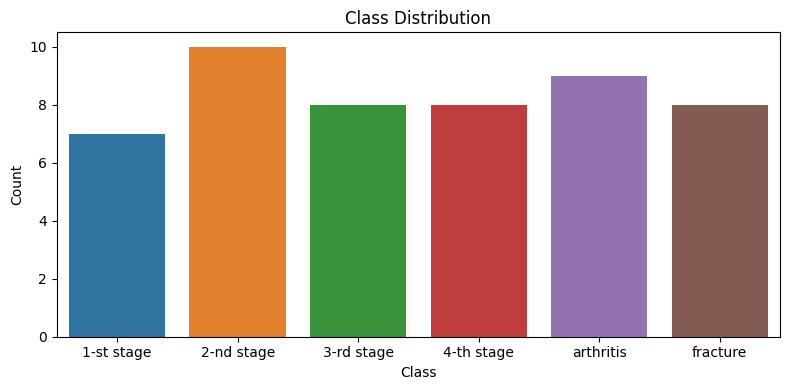

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=xray)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

این بخش از کد برای به وجود اوردن نمودار های آماری برای نتایج و داده های مدل است که در آن از کتابخانه های سی بورن و مت پلات لیب استفاده می شود 

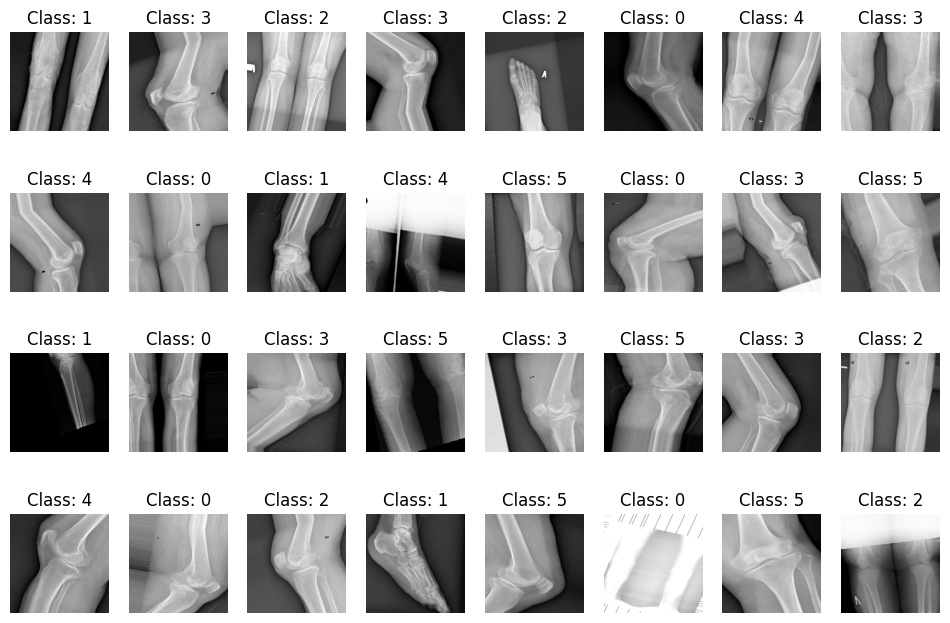

In [9]:
images, labels = train_generator.next()

# Display the images
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}') 
    plt.axis('off')

plt.show()

این کد در سه بخش انجام می شود 
بارگیری داده ها
نمایش تصاویر
نمایش نمودار

In [10]:
def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(schedule)

این تابع برای تعیین نرخ زمانبندی و یادگیری مدل استفاده می شود 

In [11]:
mymodel = Sequential()
mymodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) # طراحی یک شبکه عصبی برای کار با تصاویر با اندازه ی  224 224 3
mymodel.add(MaxPooling2D((2, 2))) # یک پنجره ی دو در دو برای کاهش اندازه ابعاد فضایی استفاده می شود
mymodel.add(Conv2D(64, (3, 3), activation='relu')) 
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(128, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Flatten())
mymodel.add(Dense(512, activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(6, activation='softmax'))  # 6 classes

لایه های Convolutional: این لایه ها فیلترهایی را روی تصویر ورودی اعمال می کنند و ویژگی هایی مانند لبه ها، بافت ها و اشکال را استخراج می کنند. هر فیلتر یک عملیات کانولوشن را روی تصویر ورودی انجام می دهد و یک نقشه ویژگی تولید می کند.

لایه‌های ادغام: لایه‌های ادغام ابعاد فضایی نقشه‌های ویژگی را کاهش می‌دهند و به استخراج مهم‌ترین ویژگی‌ها و کاهش پیچیدگی محاسباتی کمک می‌کنند. رایج ترین عملیات ادغام حداکثر ادغام است که حداکثر مقدار را در یک پنجره انتخاب می کند و بقیه را کنار می گذارد.

لایه‌های کاملاً متصل: این لایه‌ها هر نورون را در یک لایه به هر نورون در لایه بعدی متصل می‌کنند. آنها مسئول پیش بینی های نهایی بر اساس ویژگی های استخراج شده هستند.

توابع فعال‌سازی: توابع فعال‌سازی غیرخطی بودن شبکه را معرفی می‌کنند و به آن اجازه می‌دهند الگوهای پیچیده را یاد بگیرند. کد از تابع فعال سازی ReLU (واحد خطی اصلاح شده) استفاده می کند که مقادیر منفی را صفر می کند و مقادیر مثبت را بدون تغییر نگه می دارد.

Softmax Activation: تابع فعال سازی softmax در لایه نهایی برای تبدیل خروجی به امتیازات احتمال برای هر کلاس استفاده می شود. تضمین می کند که مجموع احتمالات برای همه کلاس ها برابر با 1 است 

In [12]:
mymodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

این کد کمپایلر را بر روی مای مدل طراحی می کند که به سه آرگومان نیاز دارد 

optimizer : بهینه سازی کد

loss :کمک به طبقه بندی باینری

metrics : معیار سنجیدن اموزش و ازمایش را مشخص می کند که در اینجا روی دقت تنظیم شده است 

In [14]:
history = mymodel.fit(train_generator, epochs=5, callbacks=[lr_scheduler])

Epoch 1/5
2/2 [==============================] - 5s 1s/step - loss: 0.4609 - accuracy: 0.2200 - lr: 0.0010
Epoch 2/5
2/2 [==============================] - 5s 1s/step - loss: 0.4582 - accuracy: 0.2000 - lr: 0.0010
Epoch 3/5
2/2 [==============================] - 5s 1s/step - loss: 0.4394 - accuracy: 0.3000 - lr: 0.0010
Epoch 4/5
2/2 [==============================] - 5s 1s/step - loss: 0.4423 - accuracy: 0.2200 - lr: 0.0010
Epoch 5/5
2/2 [==============================] - 5s 1s/step - loss: 0.4466 - accuracy: 0.3000 - lr: 0.0010


آرگومان epochs=50 مشخص می کند که می خواهیم مدل را برای 50 دوره آموزش دهیم. این بدان معنی است که مدل کل مجموعه داده آموزشی را 50 بار مرور می کند و پارامترهای خود را بعد از هر دوره به روز می کند.
آرگومان callbacks برای مشخص کردن هر تماسی که می‌خواهیم در طول آموزش اعمال کنیم استفاده می‌شود. در این مورد، lr_scheduler یک تابع callback است که نرخ یادگیری را در طول آموزش تنظیم می کند. زمان‌بندی نرخ یادگیری می‌تواند برای بهبود عملکرد مدل با تغییر پویا نرخ یادگیری بر اساس شرایط خاص مفید باشد

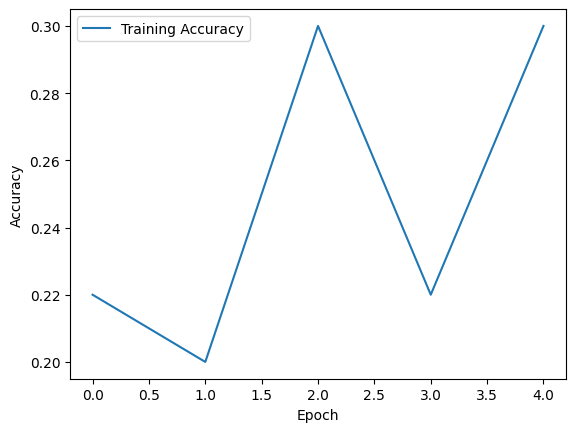

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ما ماژول matplotlib.pyplot را وارد می کنیم که مجموعه ای از توابع را برای ایجاد تجسم ها ارائه می دهد.

ما از تابع ()plt.plot برای ترسیم دقت آموزش استفاده می کنیم. ما در history.history ['accuracy'] به عنوان داده هایی که باید رسم شوند عبور می کنیم. شی تاریخچه معمولاً شامل معیارهای آموزشی است که در طول فرآیند آموزش مدل جمع آوری شده است.

ما برچسب را برای نمودار با استفاده از پارامتر label تنظیم می کنیم. در این مورد، ما آن را با عنوان "دقت آموزش" برچسب گذاری می کنیم.

برچسب محور x را با استفاده از ()plt.xlabel و برچسب محور y را با استفاده از ()plt.ylabel تنظیم می کنیم.

با استفاده از plt.legend() یک افسانه به طرح اضافه می کنیم.

در نهایت، طرح را با استفاده از ()plt.show نمایش می دهیم

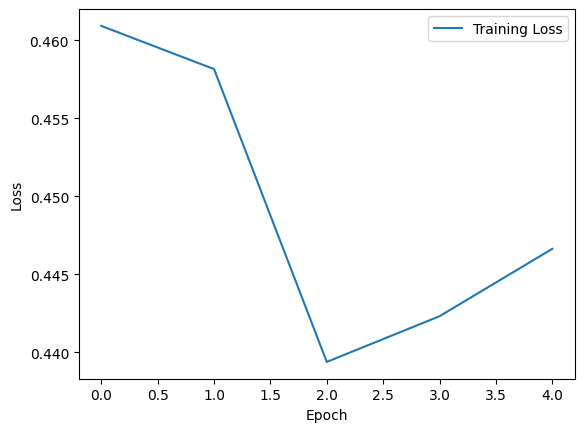

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ماژول matplotlib.pyplot را به صورت plt وارد می کنیم تا به توابع ترسیم آن دسترسی پیدا کنیم.

تابع ()plt.plot دو آرگومان می گیرد: مقادیر محور x و مقادیر محور y. در این مورد، ما history.history['loss'] را به‌عنوان مقادیر محور y پاس می‌کنیم، که نشان‌دهنده از دست دادن آموزش در هر دوره است.

ما برچسب نمودار را با استفاده از پارامتر label به عنوان "Training Loss" تنظیم کردیم. این برچسب در افسانه نمایش داده می شود.

توابع plt.xlabel() و plt.ylabel() به ترتیب برای تنظیم برچسب ها برای محور x و y استفاده می شوند.

ما تابع ()plt.legend را فراخوانی می کنیم تا افسانه را در طرح نمایش دهیم.

در نهایت برای نمایش نمودار از ()plt.show استفاده می کنیم

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def vgg16():
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))
    
    return model






In [19]:
base_model =vgg16()

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

قطعه کد ارائه شده مدل VGG16 را با وزن های از پیش آموزش داده شده از مجموعه داده «imagenet» مقداردهی اولیه می کند. همچنین شکل ورودی تصاویر را به صورت (224، 224، 3) مشخص می کند.

پس از مقداردهی اولیه مدل، کد به فریز کردن لایه های کانولوشنال ادامه می دهد. این کار با تکرار روی هر لایه در مدل پایه و تنظیم ویژگی trainable روی False انجام می شود. با این کار از آپدیت نشدن وزن لایه های کانولوشن در حین تمرین اطمینان حاصل می کنیم

In [20]:
vggmodel = models.Sequential()
vggmodel.add(base_model)
vggmodel.add(layers.Flatten())
vggmodel.add(layers.Dense(512, activation='relu'))
vggmodel.add(layers.Dropout(0.5))
vggmodel.add(layers.Dense(6, activation='softmax'))

vggmodel = models.Sequential(): این خط یک مدل متوالی را مقداردهی اولیه می کند، که به ما اجازه می دهد مدل VGG را لایه به لایه بسازیم.


vggmodel.add(base_model): در اینجا مدل پایه را به مدل VGG اضافه می کنیم. مدل پایه معمولاً یک مدل VGG از پیش آموزش دیده است که بر روی یک مجموعه داده بزرگ مانند ImageNet آموزش داده شده است.

vggmodel.add(layers.Flatten()): این خط یک لایه مسطح به مدل اضافه می کند. لایه مسطح خروجی لایه قبلی را به یک آرایه 1 بعدی تغییر شکل می دهد که برای لایه های متراکم بعدی لازم است.

vggmodel.add(layers.Dense(512, activation='relu')): در اینجا یک لایه متراکم با 512 واحد و یک تابع فعال سازی ReLU اضافه می کنیم. لایه های متراکم لایه های کاملاً متصل هستند که یک تبدیل خطی روی داده های ورودی انجام می دهند.

vggmodel.add(layers.Dropout(0.5)): این خط یک لایه dropout به مدل اضافه می کند. Dropout یک تکنیک منظم سازی است که به طور تصادفی کسری از واحدهای ورودی را در طول تمرین بر روی 0 تنظیم می کند، که به جلوگیری از اضافه کردن کمک می کند.

vggmodel.add(layers.Dense(6, activation='softmax')): در نهایت یک لایه متراکم با 6 واحد و یک تابع فعال سازی softmax اضافه می کنیم. تابع softmax خروجی مدل را به توزیع احتمال در 6 کلاس تبدیل می کند و به ما امکان پیش بینی می دهد

In [21]:
vggmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

متد کامپایل بر روی شی vggmodel فراخوانی می شود که مدل VGG را نشان می دهد. سه استدلال می گیرد:

Optimer: آرگومان optimizer الگوریتم بهینه سازی مورد استفاده در طول آموزش را مشخص می کند. در این حالت از بهینه ساز Adam با نرخ یادگیری 0.001 استفاده می شود.

loss: آرگومان loss تابع ضرر را مشخص می کند که باید استفاده شود. در اینجا از تابع تلفات متقابل آنتروپی باینری استفاده شده است که برای مسائل طبقه بندی باینری مناسب است.

معیارها: آرگومان متریک معیارهای ارزیابی را که در طول آموزش استفاده می شود را مشخص می کند. در این قطعه کد، از متریک دقت برای اندازه گیری عملکرد مدل استفاده می شود

In [23]:
history = vggmodel.fit(train_generator, epochs=5, callbacks=[lr_scheduler])

Epoch 1/5
2/2 [==============================] - 16s 5s/step - loss: 0.6896 - accuracy: 0.2400 - lr: 0.0010
Epoch 2/5
2/2 [==============================] - 15s 5s/step - loss: 0.6850 - accuracy: 0.1600 - lr: 0.0010
Epoch 3/5
2/2 [==============================] - 16s 9s/step - loss: 0.6793 - accuracy: 0.1800 - lr: 0.0010
Epoch 4/5
2/2 [==============================] - 16s 9s/step - loss: 0.6735 - accuracy: 0.2600 - lr: 0.0010
Epoch 5/5
2/2 [==============================] - 15s 5s/step - loss: 0.6686 - accuracy: 0.2000 - lr: 0.0010


vggmodel: این متغیر نمونه ای از مدل VGG را نشان می دهد که در جای دیگری از کد تعریف و مقداردهی اولیه شده است. این به عنوان مدل پایه برای آموزش عمل می کند.

train_generator: این متغیر یک شی مولد را نشان می دهد که دسته ای از داده های آموزشی را برای مدل فراهم می کند. این مسئول تغذیه مدل با داده های ورودی و برچسب های مربوطه در طول فرآیند آموزش است.

epochs=50: این پارامتر تعداد دفعاتی که مدل در کل مجموعه داده آموزشی تکرار می شود را مشخص می کند. در این حالت، مدل 50 دوره را پشت سر می گذارد و وزن های خود را پس از هر دوره به روز می کند.

callbacks= این پارامتر به ما این امکان را می‌دهد که یک یا چند تماس را در طول فرآیند آموزش لحاظ کنیم. در این قطعه کد، callback lr_scheduler ارسال می شود که به صورت پویا نرخ یادگیری را بر اساس پیشرفت آموزش تنظیم می کند.

history: این متغیر تاریخچه آموزش را که شامل معیارهایی مانند ضرر و دقت برای هر دوره است ذخیره می کند. می توان از آن برای تجزیه و تحلیل بیشتر یا تجسم فرآیند آموزش استفاده کرد

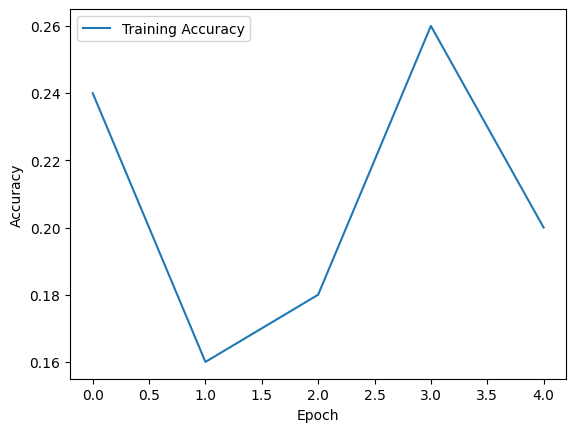

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1:این خط کد مقادیر دقت آموزشی ذخیره شده در شی history را ترسیم می کند. شی تاریخچه معمولاً پس از آموزش یک مدل یادگیری ماشینی با استفاده از چارچوب هایی مانند TensorFlow یا Keras به دست می آید. کلید دقت مقادیر دقت آموزش را نشان می دهد.

2:این خط برچسب محور x طرح را به عنوان "Epoch" تنظیم می کند. محور x تعداد دوره‌ها یا عبور از داده‌های آموزشی را نشان می‌دهد.

3: این خط برچسب محور y نمودار را به عنوان "دقت" تنظیم می کند. محور y مقادیر دقت تمرین را نشان می دهد.

4:این خط یک افسانه به طرح اضافه می کند که به شناسایی خط رسم شده کمک می کند. در این حالت، افسانه "دقت آموزش" را نمایش می دهد.

5:این خط نمودار را روی صفحه نمایش می دهد

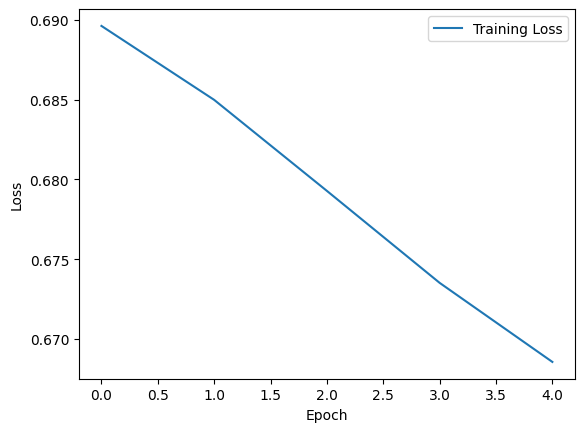

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1:ما با وارد کردن ماژول matplotlib.pyplot شروع می کنیم که مجموعه ای از توابع را برای ایجاد تجسم در پایتون فراهم می کند

2:در اینجا، ما از تابع نمودار از matplotlib.pyplot برای ایجاد نمودار خطی از دست دادن آموزش استفاده می کنیم. ما تاریخچه.history را به‌عنوان داده‌هایی که باید رسم شوند، ارسال می‌کنیم، که نشان‌دهنده مقادیر تلفات آموزشی به‌دست‌آمده در طول فرآیند آموزش است. ما همچنین برای تجسم بهتر، برچسبی به عنوان "از دست دادن آموزش" برای طرح ارائه می دهیم

3:ما برچسب محور X را به عنوان "عصر" و برچسب محور Y را به عنوان "از دست دادن" تنظیم کردیم تا اطلاعات معناداری در مورد طرح ارائه کنیم

4:ما یک تابع به طرح اضافه می کنیم تا خط نشان دهنده فقدان تمرین را شناسایی کنیم

5:در نهایت از تابع show برای نمایش نمودار روی صفحه استفاده می کنیم

In [26]:
import torch
import torch.nn as nn

class ResNet50(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNet50, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(64, 64, 3)
        self.layer2 = self._make_layer(64, 128, 4, stride=2)
        self.layer3 = self._make_layer(128, 256, 6, stride=2)
        self.layer4 = self._make_layer(256, 512, 3, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(self.relu)
        
        for _ in range(1, blocks):
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(self.relu)
        
        return nn.Sequential(*layers)


مدل سازی اولیه: خط اول کد مدل ResNet50 را با استفاده از تابع ResNet50 از کتابخانه Keras مقداردهی اولیه می کند. چندین آرگومان را به تابع ارسال می کنیم:

weights='imagenet': این آرگومان مشخص می‌کند که می‌خواهیم از وزن‌های از پیش آموزش‌دیده‌شده مدل ResNet50 که روی مجموعه داده ImageNet آموزش داده شده‌اند استفاده کنیم.
include_top=False: با قرار دادن این آرگومان بر روی False، لایه های کاملا متصل در بالای شبکه را که معمولاً برای طبقه بندی استفاده می شوند، حذف می کنیم. این به ما امکان می دهد از مدل به عنوان استخراج کننده ویژگی استفاده کنیم.
input_shape=(224, 224, 3): این آرگومان شکل تصاویر ورودی را که مدل انتظار دارد تعریف می کند. در این مورد، مدل انتظار تصاویری در اندازه 224x224 پیکسل با 3 کانال رنگی (RGB) دارد.
Freezing Layers: قسمت دوم قطعه کد روی هر لایه در base_model تکرار می شود و ویژگی Trainable آن را روی False قرار می دهد. با این کار، تمام لایه های موجود در base_model را فریز می کنیم و از به روز شدن وزن آنها در حین تمرین جلوگیری می کنیم

In [27]:
rsmodel = models.Sequential()
rsmodel.add(base_model) 
rsmodel.add(layers.Dense(512, activation='relu'))
rsmodel.add(layers.Dropout(0.5))
rsmodel.add(layers.Dense(6, activation='softmax')) 

1:در این خط یک نمونه از کلاس Sequential از ماژول Keras models ایجاد می کنیم. این نمونه به عنوان ظرف مدل ما عمل می کند و به ما امکان می دهد لایه ها را به ترتیب اضافه کنیم

2:در اینجا، یک مدل پایه از پیش آموزش دیده را به مدل متوالی خود اضافه می کنیم. Base_model یک معماری شبکه عصبی از پیش آموزش دیده را نشان می دهد که قبلاً ویژگی های مفیدی را از یک مجموعه داده بزرگ یاد گرفته است. با افزودن این مدل پایه، می‌توانیم از نمایش‌های آموخته شده آن برای کار خاص خود استفاده کنیم

3:این خط یک لایه GlobalAveragePooling2D به مدل ما اضافه می کند. این لایه ادغام میانگین فضایی را روی کل نقشه ویژگی انجام می دهد، ابعاد مکانی را کاهش می دهد و اطلاعات مهم را حفظ می کند

4:در اینجا یک لایه متراکم با 512 واحد به مدل خود اضافه می کنیم. لایه متراکم یک لایه کاملا متصل است که در آن هر نورون به هر نورون لایه قبلی متصل است. آرگومان activation='relu' مشخص می کند که تابع فعال سازی واحد خطی اصلاح شده باید استفاده شود

5:این خط یک لایه حذفی به مدل ما با نرخ انصراف 0.5 اضافه می کند. لایه حذفی به طور تصادفی 50 درصد از واحدهای ورودی را در طول آموزش روی 0 قرار می دهد که به جلوگیری از اضافه شدن کمک می کند

6:در نهایت یک لایه متراکم با 6 واحد به مدل خود اضافه می کنیم. آرگومان activation='softmax' نشان می دهد که باید از تابع فعال سازی softmax استفاده شود. Softmax خروجی لایه را به توزیع احتمال بر روی 6 کلاس ممکن تبدیل می کند و به ما امکان پیش بینی می دهد

In [30]:
rsmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

متد کامپایل بر روی شی rsmodel فراخوانی می شود که نشان دهنده مدل شبکه عصبی است که می خواهیم آموزش دهیم.

در متد کامپایل، سه آرگومان ارسال می کنیم:

optimizer=optimizers.Adam(lr=0.001): این آرگومان بهینه ساز مورد استفاده برای آموزش مدل را مشخص می کند. در اینجا، ما از بهینه ساز Adam با نرخ یادگیری 0.001 استفاده می کنیم. نرخ یادگیری اندازه مرحله ای را که بهینه ساز وزن های مدل را به روز می کند، تعیین می کند.
loss='binary_crossentropy': این آرگومان تابع ضرری را که باید در طول آموزش استفاده شود را مشخص می کند. در این مورد، ما از تابع از دست دادن آنتروپی متقاطع باینری استفاده می کنیم که برای مسائل طبقه بندی باینری مناسب است.
metrics= این آرگومان معیار(های) ارزیابی را مشخص می کند که در طول آموزش و آزمایش استفاده می شود. در اینجا، ما از دقت به عنوان معیار ارزیابی استفاده می‌کنیم که درصد نمونه‌های طبقه‌بندی صحیح را اندازه‌گیری می‌کند

In [32]:
history = rsmodel.fit(train_generator, epochs=1, callbacks=[lr_scheduler])

2/2 [==============================] - 15s 9s/step - loss: 0.6887 - accuracy: 0.2800 - lr: 0.0010


کد ارائه شده یک مدل را با استفاده از روش fit یک شی rsmodel آموزش می دهد. روش برازش معمولاً در چارچوب‌های یادگیری ماشین برای آموزش مدل‌ها استفاده می‌شود.

روش برازش چندین پارامتر از جمله داده‌های آموزشی، تعداد دوره‌ها و برگشت‌های تماس را می‌گیرد. در این حالت train_generator به عنوان داده آموزشی ارسال می شود و تعداد دوره ها روی 50 تنظیم می شود.

پارامتر callbacks روی lr_scheduler تنظیم شده است که نشان می‌دهد از یک تابع callback به نام lr_scheduler استفاده می‌شود. این کال بک وظیفه تنظیم میزان یادگیری در طول آموزش را بر عهده دارد

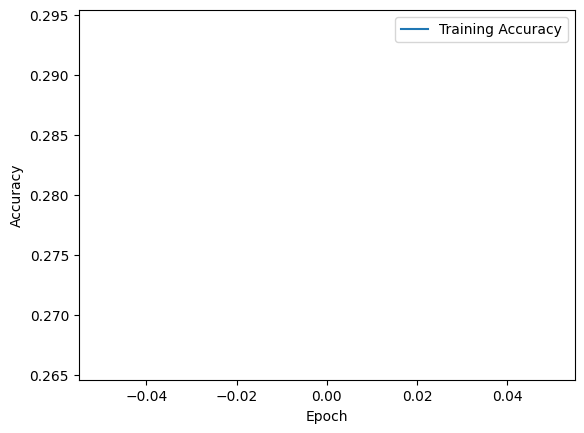

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

کشیدن نمودار دقت
اطلاعات بیشتر :همین کد برای vgg

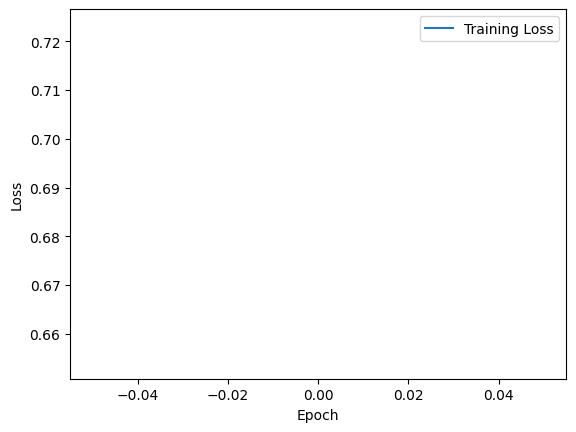

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

واردات کتابخانه های مورد نیاز

ترسیم ضرر آموزش

اضافه کردن برچسب ها و افسانه ها

نمایش طرح

In [35]:
import torch
import torch.nn as nn
import torchvision.models as models

def DenseNet121(pretrained=False, progress=True, **kwargs):
    model = models.densenet121(pretrained=pretrained, progress=progress, **kwargs)
    return model


In [37]:
dnmodel = Sequential()
dnmodel.add(base_model)

dnmodel.add(Dense(512, activation='relu'))
dnmodel.add(Dropout(0.5))
dnmodel.add(Dense(6, activation='sigmoid'))

In [38]:
dnmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = dnmodel.fit(train_generator, epochs=5, callbacks=[lr_scheduler])

Epoch 1/5
2/2 [==============================] - 17s 9s/step - loss: 0.6917 - accuracy: 0.1000 - lr: 0.0010
Epoch 2/5
2/2 [==============================] - 16s 5s/step - loss: 0.6882 - accuracy: 0.0600 - lr: 0.0010
Epoch 3/5
2/2 [==============================] - 16s 5s/step - loss: 0.6842 - accuracy: 0.1400 - lr: 0.0010
Epoch 4/5
2/2 [==============================] - 16s 9s/step - loss: 0.6792 - accuracy: 0.1400 - lr: 0.0010
Epoch 5/5
2/2 [==============================] - 16s 5s/step - loss: 0.6756 - accuracy: 0.1600 - lr: 0.0010


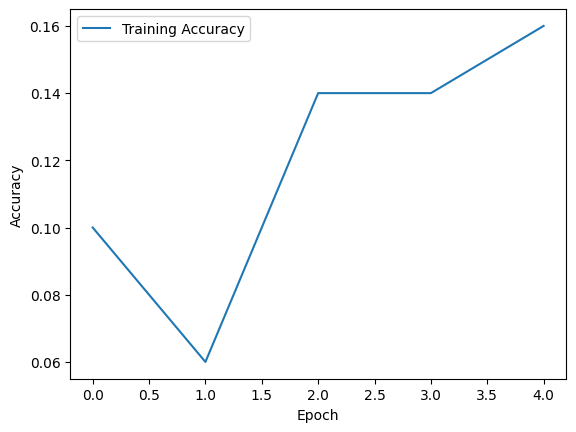

In [40]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

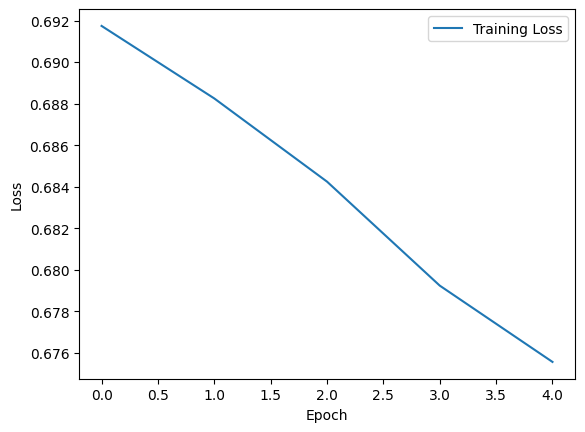

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

Exception: URL fetch failure on https://storage.googleapis.com/keras-applications/efficientnetb0_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
enmodel = Sequential()
enmodel.add(base_model)
enmodel.add(GlobalAveragePooling2D())
enmodel.add(Dense(512, activation='relu'))
enmodel.add(Dropout(0.5))
enmodel.add(Dense(1, activation='sigmoid'))

In [ ]:
enmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = enmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

In [ ]:
plt.plot(history.history['accuracy'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()